In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris=datasets.load_iris()
X=iris['data'][:,[2,3]]
y=(iris['target']==2).astype(np.float64)

In [3]:
svm_clf=Pipeline([
                ('scaler',StandardScaler()),
                ('linear_svc',LinearSVC(C=1,loss='hinge'))])



In [4]:
svm_clf.fit(X,y)
svm_clf.predict([[5.5,1.7]])

array([1.])

[-1.5, 2.5, -1, 1.5]

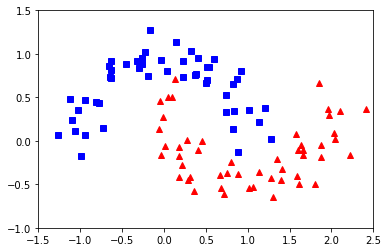

In [6]:
##non linear svm classification
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
X,y=make_moons(n_samples=100,noise=0.15,random_state=42)
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'r^')
plt.axis([-1.5,2.5,-1,1.5])

In [7]:
polynomial_svm_clf=Pipeline([
        ('poly_features',PolynomialFeatures(degree=3)),
        ('scaler',StandardScaler()),
        ('svm_clf',LinearSVC(loss='hinge',C=10))
])
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [8]:
from sklearn.svm import SVC
poly_kernel_svm_clf=Pipeline([
                            ("scaler",StandardScaler()),
                            ("svm_clf",SVC(kernel='poly',degree=3,coef0=1,C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [10]:
rbf_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel='rbf',gamma=5,C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])